In [8]:
import pickle
import os
import torch
import math
import pandas as pd

dirs = [x for x in os.listdir('./WN18') if os.path.isdir(os.path.join('./WN18', x))]

summary = {}

In [12]:
for dir in dirs:
    with open('WN18/{}/result.pickle'.format(dir), 'rb') as f:
        results = pickle.load(f)

    checkpoint = torch.load('WN18/{}/model_final.pt'.format(dir), map_location=torch.device('cpu'))

    losses = checkpoint['loss']

    batch_size = results['HP']['batch_size']
    num_epochs = results['HP']['num_epochs']
    evaluation = results['results']

    h_10 = evaluation['both']['realistic']['hits_at_10']
    h_5 = evaluation['both']['realistic']['hits_at_5']
    h_3 = evaluation['both']['realistic']['hits_at_3']
    h_1 = evaluation['both']['realistic']['hits_at_1']
    mr = evaluation['both']['realistic']['arithmetic_mean_rank']
    elapsed_training_time = results['elapsed_training_time']
    epoch_per_sec = num_epochs / elapsed_training_time


    summary[int(math.log(batch_size, 2))] = {
        'losses': losses,
        'num_epochs': num_epochs,
        'h_10': h_10,
        'h_5': h_5,
        'h_3': h_3,
        'h_1': h_1,
        'mr': mr,
        'elapsed_training_time': elapsed_training_time,
        'epoch_per_sec': epoch_per_sec,

    }


In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 75
plt.rcParams['savefig.dpi'] = 75

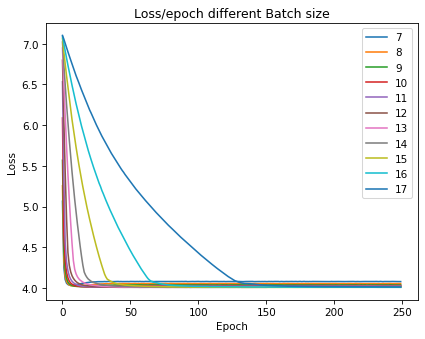

In [14]:
for size in sorted(summary):
    #print(summary[size]['losses'])
    plt.plot(summary[size]['losses'], label= size)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss/epoch different Batch size')
plt.show()

In [15]:
#

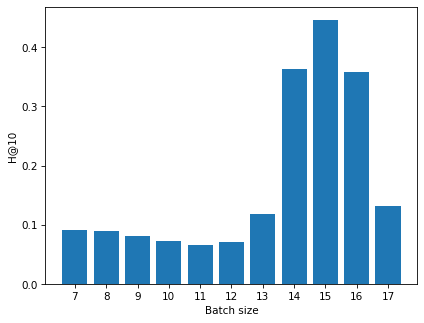

In [28]:
tmp = {}
for size in sorted(summary):
    tmp[str(size)] = summary[size]['h_10']

xs = range(len(tmp))

plt.bar(xs, tmp.values())

plt.xticks(xs, tmp.keys())

plt.xlabel('Batch size')
plt.ylabel('H@10')

plt.show()
    

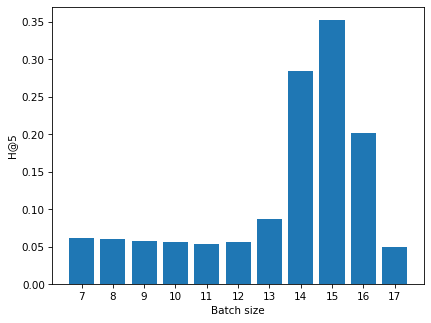

In [29]:
tmp = {}
for size in sorted(summary):
    tmp[str(size)] = summary[size]['h_5']

xs = range(len(tmp))

plt.bar(xs, tmp.values())

plt.xticks(xs, tmp.keys())

plt.xlabel('Batch size')
plt.ylabel('H@5')

plt.show()

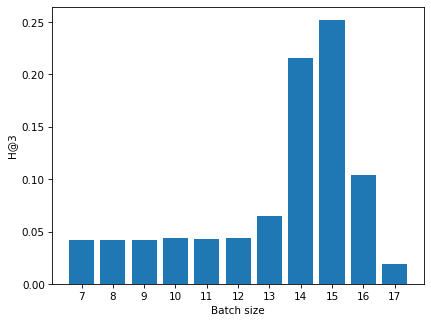

In [30]:
tmp = {}
for size in sorted(summary):
    tmp[str(size)] = summary[size]['h_3']

xs = range(len(tmp))

plt.bar(xs, tmp.values())

plt.xticks(xs, tmp.keys())

plt.xlabel('Batch size')
plt.ylabel('H@3')

plt.show()

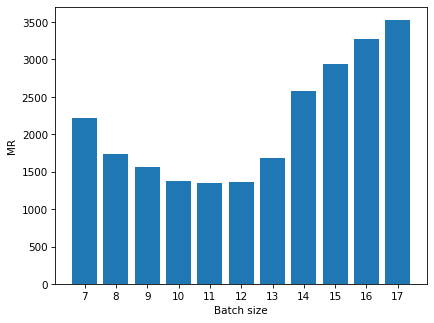

In [31]:
tmp = {}
for size in sorted(summary):
    tmp[str(size)] = summary[size]['mr']

xs = range(len(tmp))

plt.bar(xs, tmp.values())

plt.xticks(xs, tmp.keys())

plt.xlabel('Batch size')
plt.ylabel('MR')

plt.show()

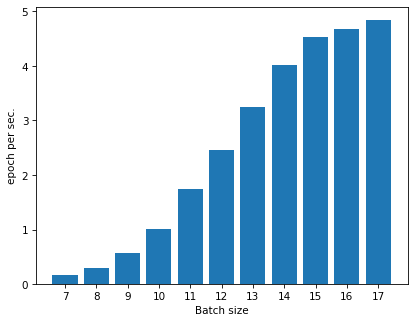

In [32]:
tmp = {}
for size in sorted(summary):
    tmp[str(size)] = summary[size]['epoch_per_sec']

xs = range(len(tmp))

plt.bar(xs, tmp.values())

plt.xticks(xs, tmp.keys())

plt.xlabel('Batch size')
plt.ylabel('epoch per sec.')

plt.show()

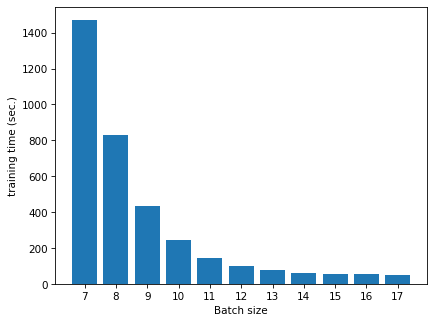

In [33]:
tmp = {}
for size in sorted(summary):
    tmp[str(size)] = summary[size]['elapsed_training_time']

xs = range(len(tmp))

plt.bar(xs, tmp.values())

plt.xticks(xs, tmp.keys())

plt.xlabel('Batch size')
plt.ylabel('training time (sec.)')

plt.show()